In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [ ]:
style.use('fivethirtyeight')

In [ ]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [ ]:
def best_fit_slope_and_intercept(x,y):
  m = (((mean(x)*mean(y)) - mean(x*y))/
  ((mean(x)*mean(x)) - mean(x*x)))
  b = mean(y) - m*mean(x)
  return m,b

In [ ]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


In [ ]:
regression_line = [(m*x) +b for x in xs]

In [ ]:
predict_x = 8
predict_y = (m*predict_x) +b

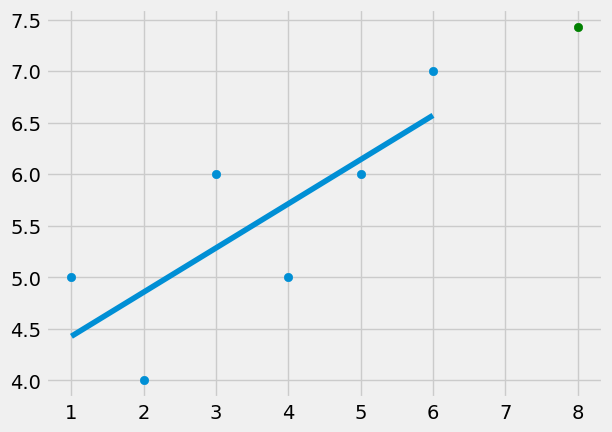

In [ ]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color="g")
plt.plot(xs, regression_line)
plt.show()

# ¿Qué tan buena es mi predicción? Necesitamos accuracy and confidence

### 📊 ¿Qué es el coeficiente de determinación \( R^2 \)?

El \( R^2 \) mide qué proporción de la variabilidad de la variable dependiente es explicada por el modelo.

La fórmula es:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Donde:

- $ SS_{res} = \sum (y_i - \hat{y}_i)^2 $: suma de los errores al cuadrado (residuos)
- $SS_{tot} = \sum (y_i - \bar{y})^2 $: suma total de los cuadrados respecto a la media

**Interpretación:**

- $y_i$: valor real observado  
- $\hat{y}_i$: valor predicho por el modelo  
- $\bar{y}$: media de los valores reales

Un $R^2$ cercano a 1 indica que el modelo explica bien los datos. Un valor bajo (o incluso negativo) indica un mal ajuste.


In [ ]:
def squared_error(ys_orig,ys_line):
  return sum((ys_line - ys_orig)**2)

In [ ]:
def coefficient_of_detrmination(ys_orig, ys_line):
  y_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1 - (squared_error_regr / squared_error_y_mean)

In [ ]:
r_squared = coefficient_of_detrmination(ys, regression_line)
r_squared

np.float64(0.5844155844155845)

# Creemos un dataset

In [ ]:
def create_dataset(hm, variance, step=2, correlation=False):
  val = 1
  ys = []
  for i in range (hm):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation == 'pos':
      val+=step
    elif correlation and correlation == 'neg':
      val-=step
  xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype = np.float64)

In [ ]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')

In [ ]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

2.1355534709193247 -7.118292682926835


In [ ]:
regression_line = [(m*x) +b for x in xs]

In [ ]:
predict_x = 8
predict_y = (m*predict_x) +b

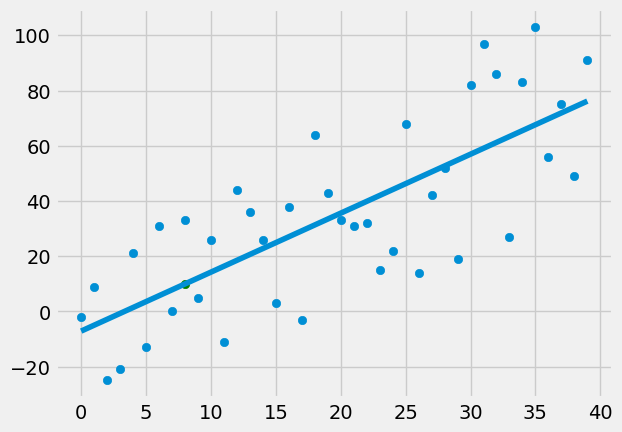

In [ ]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color="g")
plt.plot(xs, regression_line)
plt.show()

In [ ]:
r_squared = coefficient_of_detrmination(ys, regression_line)
r_squared

np.float64(0.5666189172077423)